# **JRA 日本中央競馬会 Horse Racing EDA**
by Evan Fadhil L

The purpose of this data is to do Exploratory Data Analysis from JRA日本中央競馬会 Horse Racing Dataset that scraped from https://www.netkeiba.com/ ,the largest site of Japanese horse racing.

The dataset scraped by https://www.kaggle.com/takamotoki and uploaded through Kaggle in 2021. <br> The link toward dataset are below:<br>
https://www.kaggle.com/takamotoki/jra-horse-racing-dataset

On thus website, There are 4 datasets in csv format, namely:

* Odds
* Race Result
* Corner Passing Order
* Laptime

In this analysis, we will using Race Result.csv for the preliminary Exploratory Data Analysis

Current goals on this exploratory data analysis are as follows:

* Only graded races (G1,G2,G3) or リステッド・重賞競走 that will be analyzed.
* Find insight and trivias discovered from the dataset.
* Find out horses that won most graded races.
* Fastest horse for each top 5 prestigious japan horse races (Japan Cup, Japanese Derby (Tokyo Yushun), Arima Kinen, Tenno Sho (Spring & Autumn), Yasuda Kinen) source: https://horseracing.guide/news/japans-horse-races/
* Find horses that earned most from prize money.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the necessary libraries for data analysis and visualization.

## Dataset Preparation and First Insight

Let's import the Race Result Dataset. I will import it from local files, but it can be done through online with desginated Kaggle API.

In [ ]:
# Import the dataset from KaggleHub:
%pip install kagglehub[pandas-datasets] --quiet
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "19860105-20210731_race_result.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "takamotoki/jra-horse-racing-dataset",
  file_path,
)

RR = df.copy()
#RR = Race Result

/var/folders/xd/rhk6kgcn05z39vs743rnmrvw0000gn/T/ipykernel_771/3211819320.py:16: DtypeWarning: Columns (8,11,15,16,17,18,19,20,21,22,23,24,25,26,27,34,36,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/apple/Downloads/Evan Punya/jra_racehorse_project/data/raw/19860105-20210731_race_result.csv')


In [3]:
print(RR.info())
#To show us the information about the dataset, such as number of rows, columns, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626811 entries, 0 to 1626810
Data columns (total 66 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   レース馬番ID      1626811 non-null  int64  
 1   レースID        1626811 non-null  int64  
 2   レース日付        1626811 non-null  object 
 3   開催回数         1626811 non-null  int64  
 4   競馬場コード       1626811 non-null  int64  
 5   競馬場名         1626811 non-null  object 
 6   開催日数         1626811 non-null  int64  
 7   競争条件         1626811 non-null  object 
 8   レース記号/[抽]    12834 non-null    object 
 9   レース記号/(馬齢)   827790 non-null   object 
 10  レース記号/牝      208613 non-null   object 
 11  レース記号/(父)    23423 non-null    object 
 12  レース記号/(別定)   361406 non-null   object 
 13  レース記号/(混)    753618 non-null   object 
 14  レース記号/(ハンデ)  95331 non-null    object 
 15  レース記号/(抽)    6016 non-null     object 
 16  レース記号/(市)    6180 non-null     object 
 17  レース記号/(定量)   324044 non-null   object 
 18  レー

As we can see from the result, this dataset contained of **66 columns** (variable) and **1.626.811** data entries.

Here are each explanation for every columns(variable): *i copied it from the dataset website

* レース馬番ID/Race PP ID: 下記参照
* レースID/Race ID: 下記参照
* レース日付/Race Day
* 開催回数/Race Meeting Number
* 競馬場コード/Racecourse Code
* 競馬場名/Racecourse Name
* 開催日数/N-th Racing Day
* 競争条件/Race Condition: レースのクラス分け/Race Classifications: https://www.jra.go.jp/keiba/rules/class.html (日本語/Japanese)
* レース記号/[抽]/Race Symbol/Drawing
* レース記号/(馬齢)/Race Symbol/Age
* レース記号/牝/Race Symbol/Mare: 牝馬に限定するレース記号
* レース記号/(父)/Race Symbol/Sire: 内国産種牡馬の産駒で(マル外)以外の馬
* レース記号/(別定)/Race Symbol/Special Weight
* レース記号/(混)/Race Symbol/Mixed: 内国産馬に加えて(マル外)が出走できる競走
* レース記号/(ハンデ)/Race Symbol/Handicap: ハンデキャップ: https://www.jra.go.jp/kouza/yougo/w340.html (日本語/Japanese)
* レース記号/(抽)/Race Symbol/Drawing: ＪＲＡが市場で購入し平成１４年以前に抽選配付したサラブレッド系の内国産馬
* レース記号/(市)/Race Symbol/Market: 市場取引馬
* レース記号/(定量)/Race Symbol/Fixed Weight: 定量: https://www.jra.go.jp/kouza/yougo/w542.html (日本語/Japanese)
* レース記号/牡/Race Symbol/Stallion: 牡馬に限定するレース記号
* レース記号/関東配布馬/Race Symbol/Kanto Distributed Horses
* レース記号/(指)/Race Symbol/Specified: 地方競馬の馬および騎手が出場できる競走
* レース記号/関西配布馬/Race Symbol/Kasai Distributed Horses
* レース記号/九州産馬/Race Symbol/Horses from Kyushu
* レース記号/見習騎手/Race Symbol/Apprentice
* レース記号/せん/Race Symbol/Gelding: セン馬に限定するレース記号
* レース記号/(国際)/Race Symbol/International: 内国産馬に加えて(マル外)および[カク外]が出走できる競走
* レース記号/[指]/Race Symbol/Specified: 地方競馬の騎手が騎乗できる競走
* レース記号/(特指)/Race Symbol/Special Specified: ＪＲＡが認定した地方競馬の競走または競馬番組で別に定める地方競馬の競走で第１着となった[カク地]が出走できまた地方競馬の騎手が騎乗できる競走
* レース番号/Race Number
* 重賞回次/Graded Races N-th Time
* レース名/Race Name
* リステッド・重賞競走/ Listed and Graded Races
* 障害区分/Steeplechase Category
* 芝・ダート区分/Turf and Dirt Category
* 芝・ダート区分2/Turf and Dirt Category2: 障害レースで芝とダートの両方を利用するケース有り/There are cases where both turf and dirt are used for steeplechase.
* 右左回り・直線区分/Clockwise, Anti-clockwise and Straight Course Category
* 内・外・襷区分/Inner Circle, Outer Circle and Tasuki Course Category: 障害レースで用いられる襷コースは現在は廃止/The Tasuki(crossing the course at an angle) course used in steeplechase is now obsolete.
* 距離(m)/Distance(m)
* 天候/Weather
* 馬場状態1/Track Condition1
* 馬場状態2/Track Condition2: 障害レースで芝とダートの両方を利用するケース有り/There are cases where both turf and dirt are used for steeplechase.
* 発走時刻/Post Time
* 着順/FP: Final Position: 失格、取消、除外、中断の場合は空白で着順注記に明記/In the case of Disqualified,Excluded from running, Scratched and Fail to finish, leave NaN and specify the reason in 着順注記/FP Note.
* 着順注記/FP Note: 降着(降)、再騎乗(再)、失格(失)、取消(取)、除外(除)、中断(中)を注記
* 枠番/BK: Bracket Number
* 馬番/PP: Post Position
* 馬名/Horse Name
* 性別/Sex
* 馬齢/Age
* 斤量/Weight(Kg)
* 騎手/Jockey
* タイム/Total Time(1/10s)
* 着差/Margin
* 1コーナー/Position 1st Corner: 第1コーナーを通過した順位を馬番で表示/Show the order in which the horse passed the 1st corner by the post position(PP).
* 2コーナー/Position 2nd Corner: 第2コーナーを通過した順位を馬番で表示/Show the order in which the horse passed the 2nd corner by the PP.
* 3コーナー/Position 3rd Corner: 第3コーナーを通過した順位を馬番で表示/Show the order in which the horse passed the 3rd corner by the PP.
* 4コーナー/Position 4th Corner: 第4コーナーを通過した順位を馬番で表示/Show the order in which the horse passed the 4th corner by the PP.
* 上り/L3F: Time of Last 3 Furlongs (600m)
* 単勝/Win Odds(100Yen)
* 人気/Win Fav: FAVはFavoriteの略/FAV stands for Favorite.
* 馬体重/Horse Weight: 馬体重計その他の事故によって、計量不能となった場合は省略/Cases in which weighing is not possible due to an accident with the scales or other equipment are omitted(NaN).
* 場体重増減/Horse Weight Gain and Loss: 前走時の馬体重との差/Difference from the horse's weight at the previous race
* 東西・外国・地方区分/East, West, Foreign Country and Local Category
* 調教師/Trainer
* 馬主/Owner
* 賞金(万円)/Prize Money(10000Yen)

Because the goal of this analysis is just to analyze the graded races, we have to filtered it out first

In [4]:
RRG = RR[RR['リステッド・重賞競走'].isin(['G1', 'G2', 'G3'])].copy()
#RRG = Race Result Graded
#Filtering the dataset to only include G1, G2, and G3 Races.

print(RRG.shape)
#To show the shape of the filtered dataset.

(59655, 66)


We found in the dataset, there is **59.655** graded races that recorded from total of **1.626.811** data entries.

## Seeking for Trivia/Insight
After we filtered the dataset with only for graded races. Lets seek for a few insight from the dataset, such as:

* Graded races timelines (Oldest, Most in a year)
* Prize money insight for each tier of graded races

### Graded Races Timelines
Let's find out!

Earliest year of graded races in Japan that have been recoded: 1986 

Average number of graded races per year: 114 

Year with most graded races been held is in 2018 , with total of 130 races.


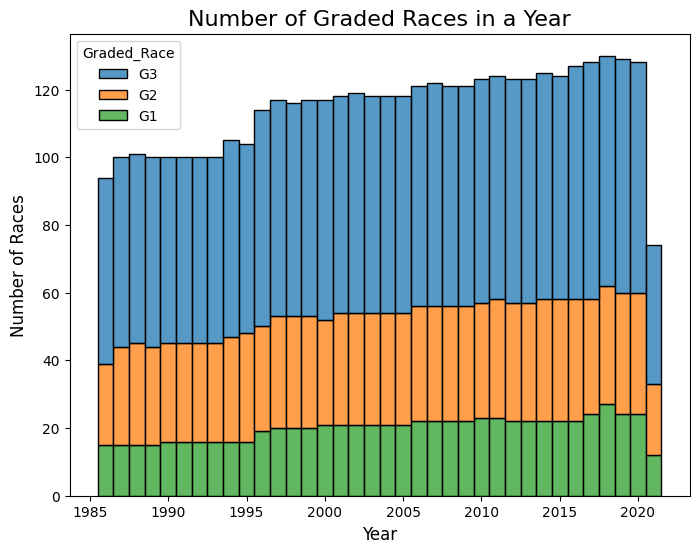

In [ ]:
RRG.loc[:, 'Races_Date'] = pd.to_datetime(RRG['レース日付'])
#Converting the 'レース日付' column to datetime format for easier date manipulation.
RRG.loc[:, 'Race_Date_Year'] = RRG['Races_Date'].dt.year
#Creating a new column "Race_Date_Year" to extract the year from the 'レース日付' column.

# let's count every races in the dataset
# Count the races basen on the '着順' column or finishing position. Each races have a number 1 finishing position, so we can use this to filter for each races.
races = RRG[RRG['着順'] == 1].copy()
num_races = races['着順'].value_counts

#Earliest year of graded races in Japan that have been recoded
earlyyear = races['Race_Date_Year'].min()

#Average number of graded races per year
aveyear = races['Race_Date_Year'].value_counts().mean()

#Most races in a year
mostyear = races['Race_Date_Year'].value_counts().idxmax()

#Number of races in that year
mostyear_count = races['Race_Date_Year'].value_counts().max()

print(f"Earliest year of graded races in Japan that have been recoded: {earlyyear} \n")
print(f"Average number of graded races per year: {aveyear:.0f} \n")
print(f"Year with most graded races been held is in {mostyear} , with total of {mostyear_count} races.")

# Make a plot to show the graph
fig, ax = plt.subplots(figsize=(8, 6))

# Seaborn cannot read kanji, so lets create new columns with English translantion
races.loc[:, 'Graded_Race'] = races['リステッド・重賞競走'].values

# Make a histogram of the number of graded races per year
sns.histplot(data=races, x='Race_Date_Year', hue='Graded_Race', discrete=True, ax=ax, multiple="stack")

# Adding titles and labels
ax.set_title('Number of Graded Races in a Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of Races', fontsize=12)

plt.show()

* The graph tell us about the distribution of graded races that have been held every year from 1986 until 2021.

* In 2021, there is jumped down on number of graded races. The reason is because of when the data scraped from the website, 2021 still halfway through so the races that being held in later month is not been held yet.

* From the graph, we can tell there is steady growth in number of graded races that been held in Japan every year. With highest growth happen in 1995-1996.

* Even though there is a growth in number of graded races, the distribution of G1,G2,and G3 for each year is relatively the same.

### Prize Money Insight
Let's find out!

Graded Races 1st Place Finish Prize Money since 1986
Maximum prize money: 
G1: 303780 thousand yen 
G2: 71512 thousand yen 
G3: 53294 thousand yen 

Average prize money: 
G1: 117142 thousand yen 
G2: 56500 thousand yen 
G3: 38659 thousand yen 

Graded races names with maximum 1st place finish prize money for each tier: 
G1: ジャパンカップ 
G2: 阪神カップ 
G3: ['産経賞オールカマー', '産經賞オールカマー', 'ダイヤモンドS'] 

--------------------------------------------------
Graded Races 1st Place Finish Prize Money since 2011
Maximum prize money: 
G1: 303780 thousand yen 
G2: 71498 thousand yen 
G3: 45532 thousand yen 

Average prize money: 
G1: 130070 thousand yen 
G2: 57696 thousand yen 
G3: 37833 thousand yen 

Graded races names with maximum 1st flace finish prize money for each tier: 
G1: ジャパンカップ 
G2: 阪神カップ 
G3: レパードステークス 

--------------------------------------------------
Graph of Graded Races 1st Place Finish Prize Money


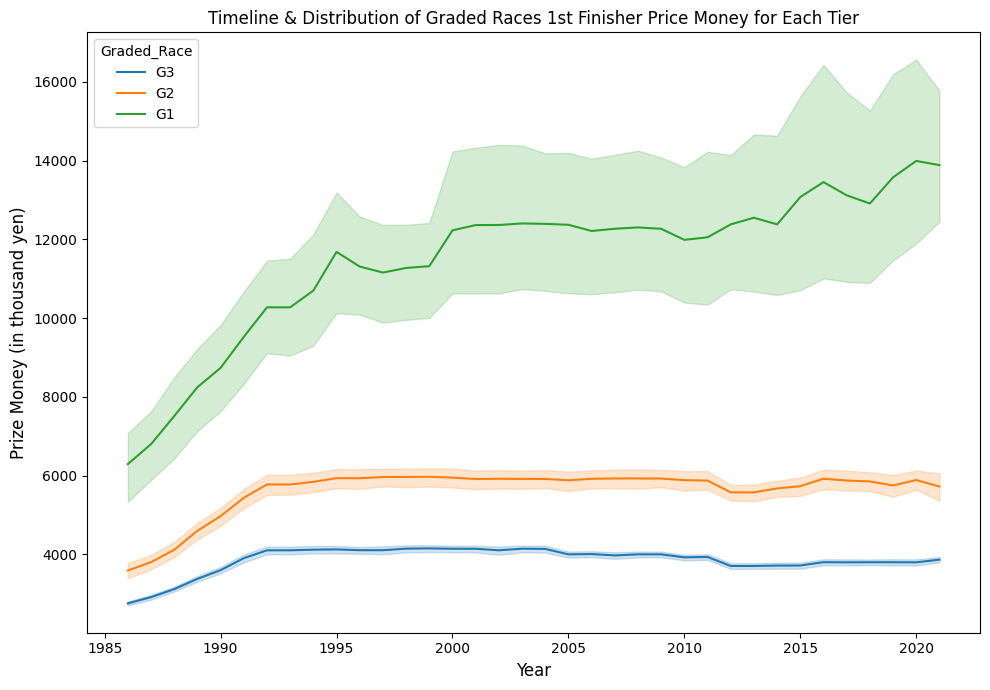

In [76]:
#Filtering the dataset for each tier graded races
G1 = RRG[RRG['リステッド・重賞競走'] == 'G1']
G2 = RRG[RRG['リステッド・重賞競走'] == 'G2']
G3 = RRG[RRG['リステッド・重賞競走'] == 'G3']

#Filtering the dataset to only include the prize money for 1st place finishers in each tier of graded
racesall = RRG[RRG['着順'] == 1].copy()
racesG1 = G1[G1['着順'] == 1]
racesG2 = G2[G2['着順'] == 1]
racesG3 = G3[G3['着順'] == 1]

#Find the highest prize money for each tier of graded races
MAXG1 = G1['賞金(万円)'].max()
MAXG2 = G2['賞金(万円)'].max()
MAXG3 = G3['賞金(万円)'].max()

#Find the average prize money for each tier of graded races
MEANG1 = racesG1['賞金(万円)'].mean()
MEANG2 = racesG2['賞金(万円)'].mean()
MEANG3 = racesG3['賞金(万円)'].mean()

#Finding the names of the graded races with the maximum prize money for each tier
MAXG1RACES = G1.loc[G1['賞金(万円)'].idxmax(), 'レース名']
MAXG2RACES = G2.loc[G2['賞金(万円)'].idxmax(), 'レース名']

# Turn out the "産経賞オールカマー" is no longer a G3 races and turned into a G2 races in 1995. so we need to excluding it out and find the races that is still graded G3.
# Step 1: Sort by 賞金(万円) descending, drop duplicates on レース名
# Find the top 3 races with the highest prize money
topG3_races = (G3.sort_values(by='賞金(万円)', ascending=False) .drop_duplicates(subset='レース名')).head(3)

# Step 2: Extract the 'レース名' as a list
MAXG3RACES = topG3_races['レース名'].tolist()

print("Graded Races 1st Place Finish Prize Money since 1986")
print(f"Maximum prize money: \nG1: {MAXG1 * 10:.0f} thousand yen \nG2: {MAXG2 * 10:.0f} thousand yen \nG3: {MAXG3 * 10:.0f} thousand yen \n")
print(f"Average prize money: \nG1: {MEANG1 * 10:.0f} thousand yen \nG2: {MEANG2 * 10:.0f} thousand yen \nG3: {MEANG3 * 10:.0f} thousand yen \n")
print(f"Graded races names with maximum 1st place finish prize money for each tier: \nG1: {MAXG1RACES} \nG2: {MAXG2RACES} \nG3: {MAXG3RACES} \n")

print(50*"-")

# Becauce we want to find more relevant prizes, we will filter the dataset to only select the graded races that been held since 2011.
# Select graded races held since 2011
LDG1 = racesG1[racesG1['Race_Date_Year'] >= 2011]
LDG2 = racesG2[racesG2['Race_Date_Year'] >= 2011]
LDG3 = racesG3[racesG3['Race_Date_Year'] >= 2011]
# LDG1, LDG2, LDG3 = Last Decade of G1, G2, G3

#Find the highest prize money for each tier of graded races
LDMAXG1 = LDG1['賞金(万円)'].max()
LDMAXG2 = LDG2['賞金(万円)'].max()
LDMAXG3 = LDG3['賞金(万円)'].max()

#Find the average prize money for each tier of graded races
LDMEANG1 = LDG1['賞金(万円)'].mean()
LDMEANG2 = LDG2['賞金(万円)'].mean()
LDMEANG3 = LDG3['賞金(万円)'].mean()

#Finding the names of the graded races with the maximum prize money for each tier
LDMAXG1RACES = LDG1.loc[LDG1['賞金(万円)'].idxmax(), 'レース名']
LDMAXG2RACES = LDG2.loc[LDG2['賞金(万円)'].idxmax(), 'レース名']
LDMAXG3RACES = LDG3.loc[LDG3['賞金(万円)'].idxmax(), 'レース名']

print("Graded Races 1st Place Finish Prize Money since 2011")
print(f"Maximum prize money: \nG1: {LDMAXG1 * 10:.0f} thousand yen \nG2: {LDMAXG2 * 10:.0f} thousand yen \nG3: {LDMAXG3 * 10:.0f} thousand yen \n")
print(f"Average prize money: \nG1: {LDMEANG1 * 10:.0f} thousand yen \nG2: {LDMEANG2 * 10:.0f} thousand yen \nG3: {LDMEANG3 * 10:.0f} thousand yen \n")
print(f"Graded races names with maximum 1st flace finish prize money for each tier: \nG1: {LDMAXG1RACES} \nG2: {LDMAXG2RACES} \nG3: {LDMAXG3RACES} \n")

print(50*"-")
print("Graph of Graded Races 1st Place Finish Prize Money")

# Make a plot to show the graph
fig, axs = plt.subplots(figsize=(10, 7))

# Seaborn cannot read kanji, so lets create new columns with English translantion
racesall.loc[:, 'Graded_Race'] = racesall['リステッド・重賞競走'].values

# Create timeline of the prize money for each tier with a line plot
sns.lineplot(data=racesall, x='Race_Date_Year', y='賞金(万円)', hue='Graded_Race', ax=axs)
axs.set_title('Timeline & Distribution of Graded Races 1st Finisher Price Money for Each Tier', fontsize=12)
axs.set_xlabel('Year', fontsize=12)
axs.set_ylabel('Prize Money (in thousand yen)', fontsize=12)

plt.tight_layout()
plt.show()

* The graph tell us about timeline and the distribution of graded races 1st place finisher price money that have been held every year from 1986 until 2021.

* G2 and G3 races doesn't have much range of 1st place finisher price money between their own grade. Meanwhile, G1 races haves significant range of 1st place finisher price money among their races.

* For G1 horses races, there is steady growth in 1st place finisher price money throughout 1986 to 2021.

* Different from G1 races, G2 and G3 races 1st place finisher price money are relatively same since around 1993.

* all of the graded races have significant growth of 1st place finisher price money between 1986 to 1992.

* Because of growth that happening throughout times, the gap for 1st place finisher price money between G1 and G2 is widening.

## **BEST HORSE IN JAPAN**
Let's Find Out!

In [ ]:
# Filter only race wins
wins = RRG[RRG['着順'] == 1]
winsG1 = wins[wins['リステッド・重賞競走'] == 'G1']
winsG2 = wins[wins['リステッド・重賞競走'] == 'G2']
winsG3 = wins[wins['リステッド・重賞競走'] == 'G3']
# Count wins per horse
horse_wins = wins['馬名'].value_counts()
horse_winsG1 = winsG1['馬名'].value_counts()
horse_winsG2 = winsG2['馬名'].value_counts()
horse_winsG3 = winsG3['馬名'].value_counts()

all_horse_races = RRG['馬名'].value_counts()
all_horses = RRG['馬名'].unique()  # List of all unique horses
all_horse_wins = (
    wins['馬名'].value_counts()      # Count wins for horses that won
    .reindex(all_horses, fill_value=0)  # Add zero-win horses
)
ave_horse_races = all_horse_races.mean()
ave_horse_wins = all_horse_wins.mean()
win_chance = (all_horse_wins / all_horse_races) * 100  # Calculate win chance as a percentage

print(f"Average races per horse: {ave_horse_races:.2f}")
print(f"Average wins per horse (including zero-win horses): {ave_horse_wins:.2f}")
print(f"Average win chance per horse: {win_chance.mean():.2f}%")

# Find the top 5 horses with the most wins
top5_wins = horse_wins.head(5)
top5_winsG1 = horse_winsG1.head(5)
top5_winsG2 = horse_winsG2.head(5)
top5_winsG3 = horse_winsG3.head(5)

print("\nTop 5 Most Winning Horses (All Tiers):")
for i, (horse, wins) in enumerate(top5_wins.items(), 1):
    print(f"{i}. {horse}: {wins} wins")
print("\nTop 5 Most Winning Horses in G1:")
for i, (horse, wins) in enumerate(top5_winsG1.items(), 1):
    print(f"{i}. {horse}: {wins} wins")
print("\nTop 5 Most Winning Horses in G2:")
for i, (horse, wins) in enumerate(top5_winsG2.items(), 1):
    print(f"{i}. {horse}: {wins} wins")
print("\nTop 5 Most Winning Horses in G3:")
for i, (horse, wins) in enumerate(top5_winsG3.items(), 1):
    print(f"{i}. {horse}: {wins} wins")

Average races per horse: 4.11
Average wins per horse (including zero-win horses): 0.28
Average win chance per horse: 3.27%

Top 5 Most Winning Horses (All Tiers):
1. テイエムオペラオー: 12 wins
2. オグリキャップ: 12 wins
3. ゴールドシップ: 11 wins
4. ディープインパクト: 10 wins
5. キタサンブラック: 10 wins

Top 5 Most Winning Horses in G1:
1. アーモンドアイ: 8 wins
2. テイエムオペラオー: 7 wins
3. キタサンブラック: 7 wins
4. ウオッカ: 7 wins
5. ディープインパクト: 7 wins

Top 5 Most Winning Horses in G2:
1. バランスオブゲーム: 6 wins
2. メジロマックイーン: 5 wins
3. マツリダゴッホ: 5 wins
4. カンパニー: 5 wins
5. ナリタトップロード: 5 wins

Top 5 Most Winning Horses in G3:
1. ブロードアピール: 5 wins
2. スマートボーイ: 5 wins
3. メイショウカイドウ: 5 wins
4. インカンテーション: 5 wins
5. クラレント: 5 wins


* For every horses that ever participated in graded races, on average they had 4.11 races on graded races before they stopped racing for any reason (retired, injury, etc).
* Horses that ever particapted in graded races only had average of 0.28 races win throughout their career (until 2021).
* In other words, the chance for a horse to win at least a single graded races is only 3.27% (In consideration that they are already qualified to races in graded races)

**Best Horses that ever raced throughout Graded Race Horse in Japan:**

Top 5 Most Winning Horses (All Tiers):
1. TM Opera O (テイエムオペラオー): 12 wins <br>
2. Oguri Cap (オグリキャップ): 12 wins <br>
3. Gold Ship (ゴールドシップ): 11 wins <br>
4. Deep Impact (ディープインパクト): 10 wins <br>
5. Kitasan Black (キタサンブラック): 10 wins <br>

Top 5 Most Winning Horses in G1:
1. Almond Eye (アーモンドアイ): 8 wins <br>
2. TM Opera O (テイエムオペラオー): 7 wins <br>
3. Kitasan Black (キタサンブラック): 7 wins <br>
4. Vodka (ウオッカ): 7 wins <br>
5. Deep Impact (ディープインパクト): 7 wins <br>

Top 5 Most Winning Horses in G2:
1. Balance of Game (バランスオブゲーム): 6 wins <br>
2. Mejiro McQueen (メジロマックイーン): 5 wins <br>
3. Matsurida Gogh (マツリダゴッホ): 5 wins <br>
4. Company (カンパニー): 5 wins <br>
5. Narita Top Road (ナリタトップロード): 5 wins <br>

Top 5 Most Winning Horses in G3:
1. Broad Appeal (ブロードアピール): 5 wins <br>
2. Smart Boy (スマートボーイ): 5 wins <br>
3. Meisho Kaido (メイショウカイドウ): 5 wins <br>
4. Incantation (インカンテーション): 5 wins <br>
5. Clarent (クラレント): 5 wins <br>

## **FASTEST HORSE IN JAPAN**
Lets's Find Out!

In [8]:
# Filtering the dataset to only top 5 prestigious races in Japan
top_races = ['天皇賞(春)', '天皇賞(秋)', 'ジャパンカップ', '有馬記念', '東京優駿', '安田記念']
TOP5_RRG = RRG[RRG['レース名'].isin(top_races)].copy()

# Converting the 'タイム' column to datetime format for easier date manipulation
TOP5_RRG['Races_Time'] = pd.to_timedelta('00:' + TOP5_RRG['タイム'])

# Converting to only seconds for easier calculations
TOP5_RRG['Races_Seconds'] = TOP5_RRG['Races_Time'].dt.total_seconds()

# Find the fastest horses for each race
# First get the indices of the fastest times for each race
fastest_indices = TOP5_RRG.groupby('レース名')['Races_Seconds'].idxmin()

# Then use these indices to get all the information about these records
horse_time = TOP5_RRG.loc[fastest_indices, ['レース名', 'Races_Seconds', '馬名', 'Race_Date_Year']].copy()

# Format the time nicely
def format_time(seconds):
    if pd.isna(seconds):
        return np.nan
    minutes = int(seconds // 60)
    sec = seconds % 60
    return f"{minutes}:{sec:05.2f}"  # Shows 2 decimal places for seconds

horse_time['Formatted_Time'] = horse_time['Races_Seconds'].apply(format_time)

# Rename columns for clarity
horse_time = horse_time.rename(columns={
    '馬名': 'Horse_Name',
    'Race_Date_Year': 'Winning_Year'
})

# Reorder columns
horse_time = horse_time[['レース名', 'Horse_Name', 'Winning_Year', 'Races_Seconds', 'Formatted_Time']]

print("\nFastest Horses for each of Top 5 prestigious Races in Japan:")
for i, row in horse_time.iterrows():
    print(f"{row['Horse_Name']} is the fastest in {row['レース名']} at {row['Winning_Year']}, with the time of {row['Formatted_Time']}")


Fastest Horses for each of Top 5 prestigious Races in Japan:
ファルブラヴ is the fastest in ジャパンカップ at 2002, with the time of 2:12.20
キタサンブラック is the fastest in 天皇賞(春) at 2017, with the time of 3:12.50
トーセンジョーダン is the fastest in 天皇賞(秋) at 2011, with the time of 1:56.10
インディチャンプ is the fastest in 安田記念 at 2019, with the time of 1:30.90
ゼンノロブロイ is the fastest in 有馬記念 at 2004, with the time of 2:29.50
シャフリヤール is the fastest in 東京優駿 at 2021, with the time of 2:22.50


Based on result until 2021, the fastest horses ever recorded in each Top 5 prestigious Races in Japan are:

* **Japan Cup (ジャパンカップ)**<br>
Falbrav in 2002 (ファルブラヴ) with race time of 2:12.20

* **Tenno Sho (Spring) / (天皇賞(春))**<br>
Kitasan Black (キタサンブラック) in 2017 with race time of 3:12.50

* **Tenno Sho (Autumn) / (天皇賞(秋))**<br>
Tosen Jordan (トーセンジョーダン) in 2011 with race time of 1:56.10

* **Yasuda Kinen (安田記念)**<br>
Indy Champ (インディチャンプ) in 2019 with race time of 1:30.90

* **Arima Kinen (有馬記念)**<br>
Zenno Rob Roy (ゼンノロブロイ) in 2004 with race time of 2:29.50

* **Tokyo Yushun (東京優駿)**<br>
Shahryar (シャフリヤール) in 2021 with race time of 2:22.50

## **HORSE THAT HAD MOST PRIZE MONEY EARNED IN JAPAN**
Lets's Find Out!

In [ ]:
# Ensure 賞金(万円) is numeric
RRG.loc[:, '賞金(万円)'] = pd.to_numeric(RRG['賞金(万円)'], errors='coerce')

# Group by 馬名 and sum 賞金(万円)
horse_prize = RRG.groupby('馬名', as_index=False)['賞金(万円)'].sum()

# Sort descending by prize
horse_prize = horse_prize.sort_values(by='賞金(万円)', ascending=False)

# Get Top 5 horses by prize money
top5_horse_prize = horse_prize.head(5)

# Fill NaN in 賞金(万円) with 0, then sum
total_prize = df['賞金(万円)'].fillna(0).sum()

# Count unique horses
num_horses = df['馬名'].nunique()

all_horse_earned = total_prize / num_horses

mean_horse_prize = horse_prize['賞金(万円)'].mean() * 10  # Convert to yen
print(f"\nAverage prize money per horse (that ever win prizes): {mean_horse_prize:.0f} thousand yen")
print(f"\nAverage prize money per horse (that ever participate in graded races): {all_horse_earned:.0f} thousand yen")

print("\nTop 5 Most Winning Horses (All Tiers):")
for idx, (_, row) in enumerate(top5_horse_prize.iterrows(), start=1):
    print(f"{idx}. {row['馬名']}: {row['賞金(万円)'] * 10:.0f} thousand yen")


Average prize money per horse (that ever win prizes): 30721 thousand yen

Average prize money per horse (that ever win prizes): 1563 thousand yen

Top 5 Most Winning Horses (All Tiers):
1. キタサンブラック: 1863643 thousand yen
2. テイエムオペラオー: 1816569 thousand yen
3. アーモンドアイ: 1511763 thousand yen
4. ディープインパクト: 1428376 thousand yen
5. ブエナビスタ: 1379633 thousand yen


* Average prize money for horses (that ever win a prize money) is around **¥30,721,000** yen or approximately **$204,073.67** USD (per August 2025).

* Average prize money for horses (that ever participate in graded races in Japan) is around **¥1,563,000** yen or approximately **$10,380.373** USD (per August 2025).

<br>

Based on result until 2021, the most earned horses that ever recorded in Japan graded horse races are:

Top 5 Most Winning Horses (All Tiers):
1. ***Kitasan Black*** (キタサンブラック): **¥1,863,643,000** or approximately **$12,486,781.33** USD <br>

2. ***TM Opera O*** (テイエムオペラオー): **¥1,816,569,000** or approximately **$12,171,376.11** USD <br>

3. ***Almond Eye*** (アーモンドアイ): **¥1,511,763,000** or approximately **$10,129,114.86** USD <br>

4. ***Deep Impact*** (ディープインパクト): **¥1,428,376,000** or approximately **$9,574,467.50** USD <br>

5. ***Buena Vista*** (ブエナビスタ): **¥1,379,633,000** or approximately **$9,247,741.01** USD <br>